In [9]:
import pandas as pd

def get_starters(df,pos):
    df = df[(df.Pos.str.contains(pos))]
    df = df.groupby('Team').max().reset_index()
    df = df.drop('Player', axis=1)
    return df


In [43]:
salaries = pd.read_csv(r"C:\Users\JustinK\Downloads\2021 All Salaries - Salary_all.csv")
columns = ['Pos', 'Team', 'Player','AA$' ,'2021 Salary', "% of Cap", 'Win', "Win %"]
df = pd.DataFrame(salaries,columns=columns)
df = df[~(df['2021 Salary'] <= 1)]
positions = df.Pos.unique()
starter_df = pd.DataFrame()
for p in positions:
    temp = get_starters(df,p)
    starter_df = pd.concat([starter_df,temp])

correlation = starter_df.groupby('Pos')[['% of Cap','Win %']].corr(method="kendall")
correlation = correlation.drop('% of Cap', axis=1)
correlation = correlation.drop('P',axis=0)
correlation = correlation[~(correlation['Win %'] == 1)]
correlation = correlation.round(3)
correlation.to_clipboard()

<Axes: ylabel='Pos-None'>

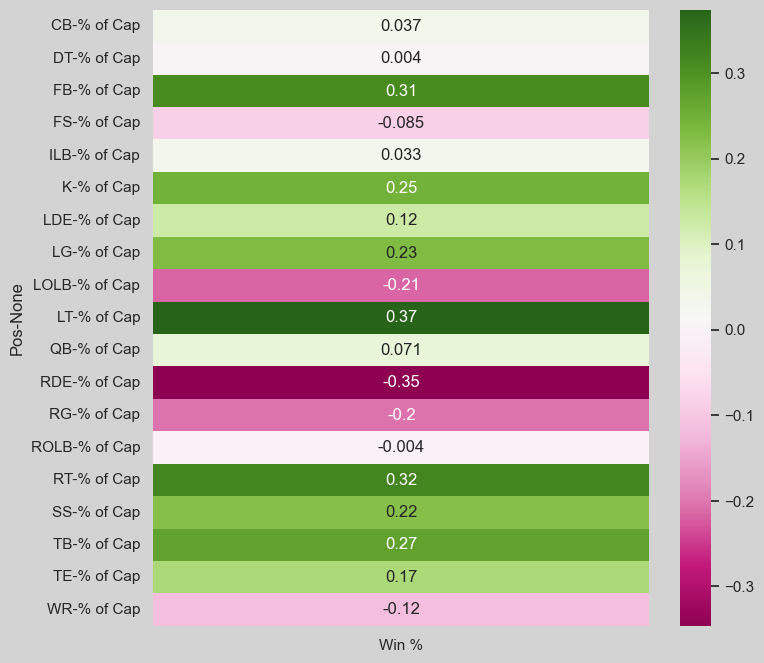

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
sns.set(rc={'figure.facecolor':'lightgrey'})
sns.heatmap(correlation, annot=True, cmap='PiYG')